In [ ]:
# !pip install librosa
# !pip install datasets

In [ ]:
import librosa
import librosa.display
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
#!huggingface-cli login

In [ ]:
# i = 0
# for sample in ml_shuffle:
#   print(sample["audio"]["sampling_rate"])
#   print(len(sample["audio"]["array"]))
#   i = i + 1
#   if i > 10:
#     break

In [ ]:
def process_audio(item, length=192000, sr=48000):
    if len(item) < length:
        item = np.pad(item, (0, length - len(item)), 'constant')
    else:
        item = item[:length]
    mfcc = librosa.feature.mfcc(y=item, sr=sr, n_mfcc=13)
    return mfcc


In [ ]:
def add_language(code, label, audios, labels):
    ds = load_dataset("mozilla-foundation/common_voice_12_0", code, split="train", streaming=True, cache_dir='/content/my_cache')
    ds_shuffle = list(ds.shuffle())
    for sample in ds_shuffle:
        labels.append(label)
        audios.append(process_audio(sample["audio"]["array"]))

# Many Classes

In [ ]:
# Create dataset
audios = []
labels = []

add_language("ml", 0, audios, labels)
add_language("kk", 1, audios, labels)
add_language("vot", 2, audios, labels)
add_language("ne-NP", 3, audios, labels)
add_language("tig", 4, audios, labels)
add_language("ko", 5, audios, labels)
add_language("myv", 6, audios, labels)
add_language("oc", 7, audios, labels)
add_language("sc", 8, audios, labels)
add_language("ti", 9, audios, labels)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Reading metadata...: 459it [00:00, 1623.43it/s]
Reading metadata...: 453it [00:00, 4527.27it/s]
Reading metadata...: 96it [00:00, 996.21it/s]
Reading metadata...: 167it [00:00, 999.40it/s]
Reading metadata...: 10it [00:00, 109.24it/s]
Reading metadata...: 94it [00:00, 1080.24it/s]
Reading metadata...: 1241it [00:00, 11611.52it/s]
Reading metadata...: 41it [00:00, 478.23it/s]
Reading metadata...: 458it [00:00, 4873.88it/s]
Reading metadata...: 10it [00:00, 88.48it/s]


In [ ]:
audios = np.array(audios)
audios = audios.reshape(audios.shape[0], -1)
scaler = StandardScaler()
audios = scaler.fit_transform(audios)

labels = np.array(labels)
print(audios.shape)
#print(labels)

(3029, 4888)


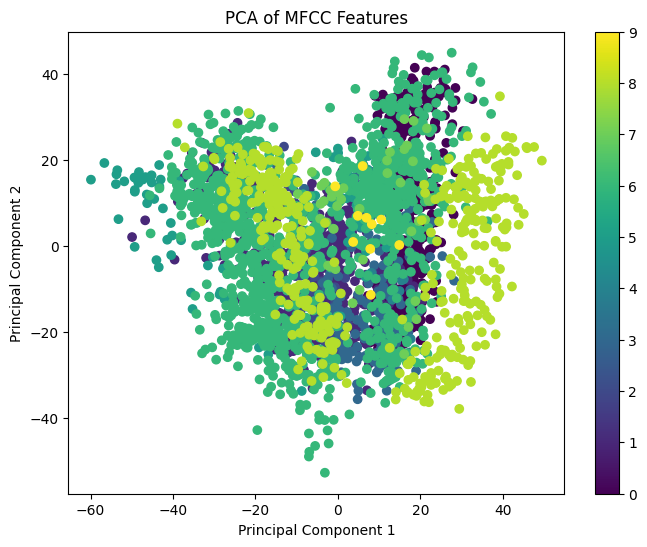

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(audios)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.title('PCA of MFCC Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(audios, labels, test_size=0.3, random_state=42)

classifier = SVC(kernel='rbf', C=1, gamma='scale')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

scores = classification_report(y_test, y_pred)
print(scores)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       0.90      0.77      0.83       140
           2       1.00      0.92      0.96        24
           3       0.96      0.88      0.92        52
           4       0.00      0.00      0.00         3
           5       1.00      0.57      0.72        30
           6       0.86      0.99      0.92       353
           7       1.00      0.62      0.77         8
           8       0.97      0.93      0.95       148
           9       0.00      0.00      0.00         3

    accuracy                           0.92       909
   macro avg       0.77      0.67      0.71       909
weighted avg       0.92      0.92      0.91       909



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Large Classes

In [ ]:
audios2 = []
labels2 = []

add_language("bg", 0, audios2, labels2)
add_language("da", 1, audios2, labels2)

Reading metadata...: 3212it [00:00, 8344.57it/s]
Reading metadata...: 2734it [00:00, 11165.39it/s]


In [ ]:
audios2 = np.array(audios2)
audios2 = audios2.reshape(audios2.shape[0], -1)
scaler = StandardScaler()
audios2 = scaler.fit_transform(audios2)

labels2 = np.array(labels2)
print(audios2.shape)
#print(labels2)

(5946, 4888)


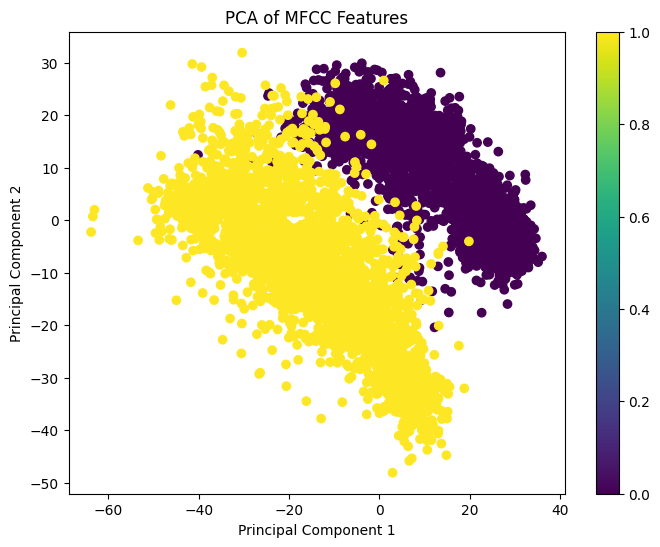

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(audios2)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2, cmap='viridis')
plt.colorbar()
plt.title('PCA of MFCC Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(audios2, labels2, test_size=0.3, random_state=42)

classifier = SVC(kernel='rbf', C=1, gamma='scale')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

scores = classification_report(y_test, y_pred)
print(scores)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       997
           1       0.99      1.00      0.99       787

    accuracy                           0.99      1784
   macro avg       0.99      0.99      0.99      1784
weighted avg       0.99      0.99      0.99      1784

